In [182]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [183]:
testperson = 10

In [184]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Lovro_10.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.280089,1,1,-35.225849,39.566498,661.269531,25.397694,40.812443,661.519897,0.575338,...,3.058060,3.223389,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
1,0.290069,1,1,-35.175686,39.533012,660.860657,25.405876,40.776054,661.247314,0.575277,...,3.060837,3.228668,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
2,0.300622,1,1,-35.174614,39.468277,660.373962,25.355259,40.751617,660.928650,0.575332,...,3.068344,3.233139,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
3,0.312812,1,1,-35.220711,39.469833,660.427979,25.300890,40.747181,660.954163,0.575425,...,3.071701,3.241806,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
4,0.323692,1,1,-35.277245,39.425705,660.519836,25.265976,40.731449,661.051086,0.575538,...,3.082748,3.255035,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
5,0.333551,1,1,-35.340462,39.402588,660.719055,25.213081,40.728355,661.257507,0.575652,...,3.088562,3.262146,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
6,0.345911,1,1,-35.407440,39.378807,660.847290,25.152290,40.727608,661.397400,0.575783,...,3.091278,3.263657,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
7,0.357045,1,1,-35.472340,39.378368,661.060791,25.095303,40.714912,661.624512,0.575898,...,3.097534,3.266678,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
8,0.367063,1,1,-35.542698,39.365055,661.274048,25.047098,40.716259,661.850525,0.576026,...,3.103271,3.273956,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive
9,0.379457,1,1,-35.606071,39.353481,661.482849,24.997360,40.752068,662.076477,0.576139,...,3.108826,3.280655,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive


In [185]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(290484, 39)

In [186]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P09_text.txt', 'AI_HC_P09_MCQ.txt', 'AI_HC_P09_FIBQ.txt',
       'OR_HC_P09_text.txt', 'OR_HC_P09_MCQ.txt', 'OR_HC_P09_FIBQ.txt',
       'AI_SK_P09_text.txt', 'AI_SK_P09_MCQ.txt', 'AI_SK_P09_FIBQ.txt',
       'OR_SK_P09_text.txt', 'OR_SK_P09_MCQ.txt', 'OR_SK_P09_FIBQ.txt',
       'AI_KB_P09_text.txt', 'AI_KB_P09_MCQ.txt', 'AI_KB_P09_FIBQ.txt',
       'OR_KB_P09_text.txt', 'OR_KB_P09_MCQ.txt', 'OR_KB_P09_FIBQ.txt'],
      dtype=object)

In [187]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-55.137508,37.051659,634.188965,5.254268,38.177567,636.629272,0.623490,...,2.729309,2.863464,True,OR_SK_P09_text.txt,9.0,22.0,Arial,SK,False,Immersive
1,0.011158,1,1,-55.270554,36.996792,633.992126,5.075539,38.178490,636.440002,0.623829,...,2.727585,2.863937,True,OR_SK_P09_text.txt,9.0,22.0,Arial,SK,False,Immersive
2,0.021479,1,1,-55.387913,36.965908,633.932373,4.960148,38.176273,636.396667,0.624106,...,2.730316,2.861969,True,OR_SK_P09_text.txt,9.0,22.0,Arial,SK,False,Immersive
3,0.033297,1,1,-55.504665,36.940990,633.790833,4.827441,38.173553,636.270935,0.624398,...,2.733490,2.858002,True,OR_SK_P09_text.txt,9.0,22.0,Arial,SK,False,Immersive
4,0.044375,1,1,-55.606159,36.928741,633.608337,4.710040,38.179848,636.097839,0.624663,...,2.737717,2.859848,True,OR_SK_P09_text.txt,9.0,22.0,Arial,SK,False,Immersive


In [188]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,581.393471,599.834175,765.821743,848.100414
1,0.011158,590.956726,597.199440,767.346268,842.895212
2,0.021479,591.252136,601.984444,766.673183,840.428267
3,0.033297,589.202652,601.322136,766.108675,846.004086
4,0.044375,586.614876,604.235306,774.389362,857.858505
...,...,...,...,...,...
28532,346.236803,2029.801331,2014.148407,1188.469133,1210.045938
28533,346.247772,2034.331818,2019.818573,1187.107258,1209.086266
28534,346.259739,2034.364319,2020.380707,1190.898056,1214.678736
28535,346.269740,2036.654816,2017.062836,1194.778547,1210.609846


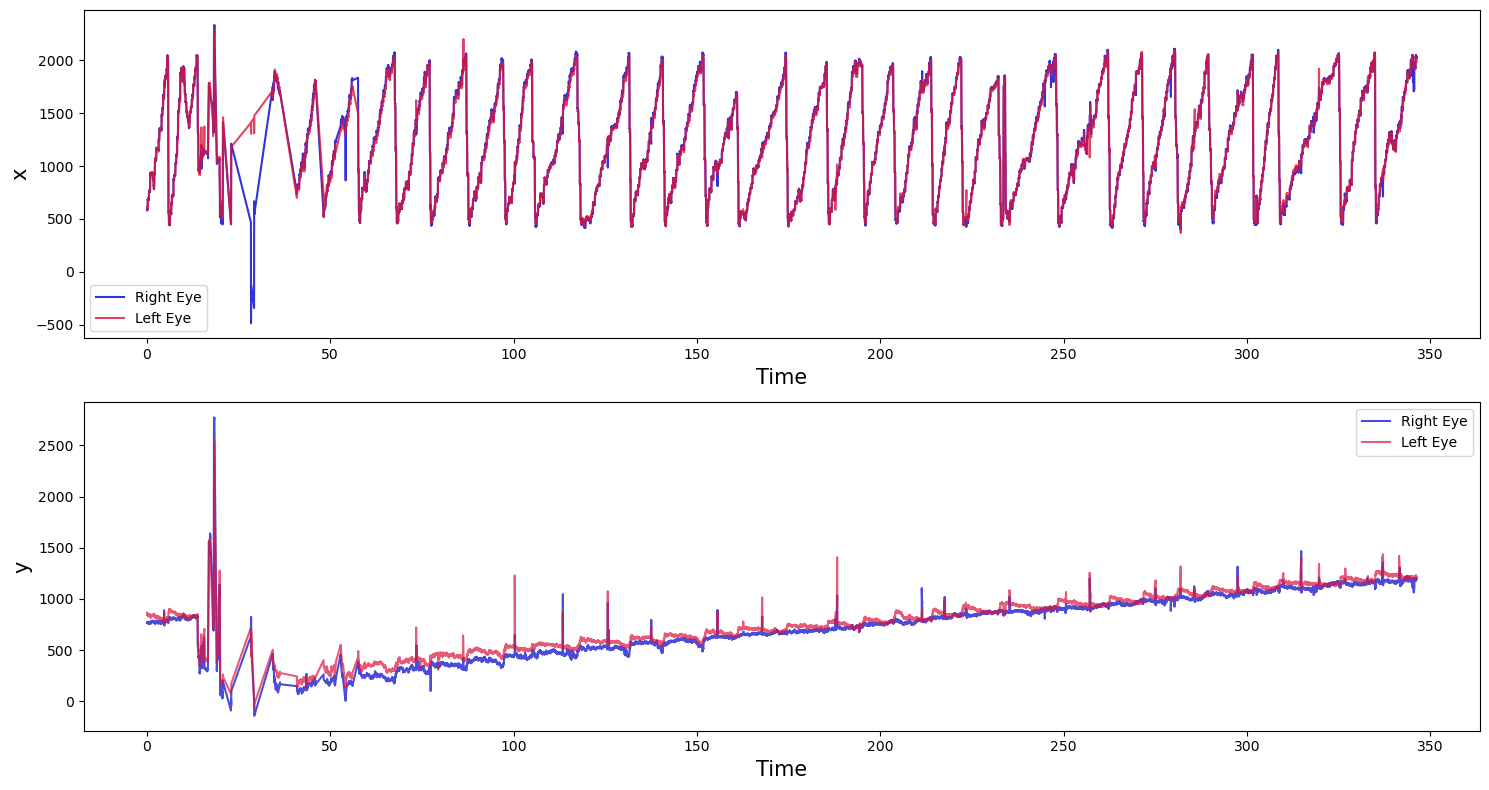

In [189]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [190]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [191]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [192]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [193]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,576.156578,570.561600,313.826373,403.191247
1,0.011892,576.766510,571.201973,309.172933,400.842705
2,0.023038,573.660431,579.201431,307.651820,402.630215
3,0.033553,570.859032,576.929359,307.734497,401.911597
4,0.045068,566.853981,577.390785,311.309924,403.365741
...,...,...,...,...,...
135,1.498968,999.438858,976.047974,309.501364,390.645332
136,1.510731,999.210587,980.015335,309.907708,394.686241
137,1.522961,991.358948,980.635681,314.313269,391.642084
138,1.532368,992.397156,978.655930,315.591803,392.499404


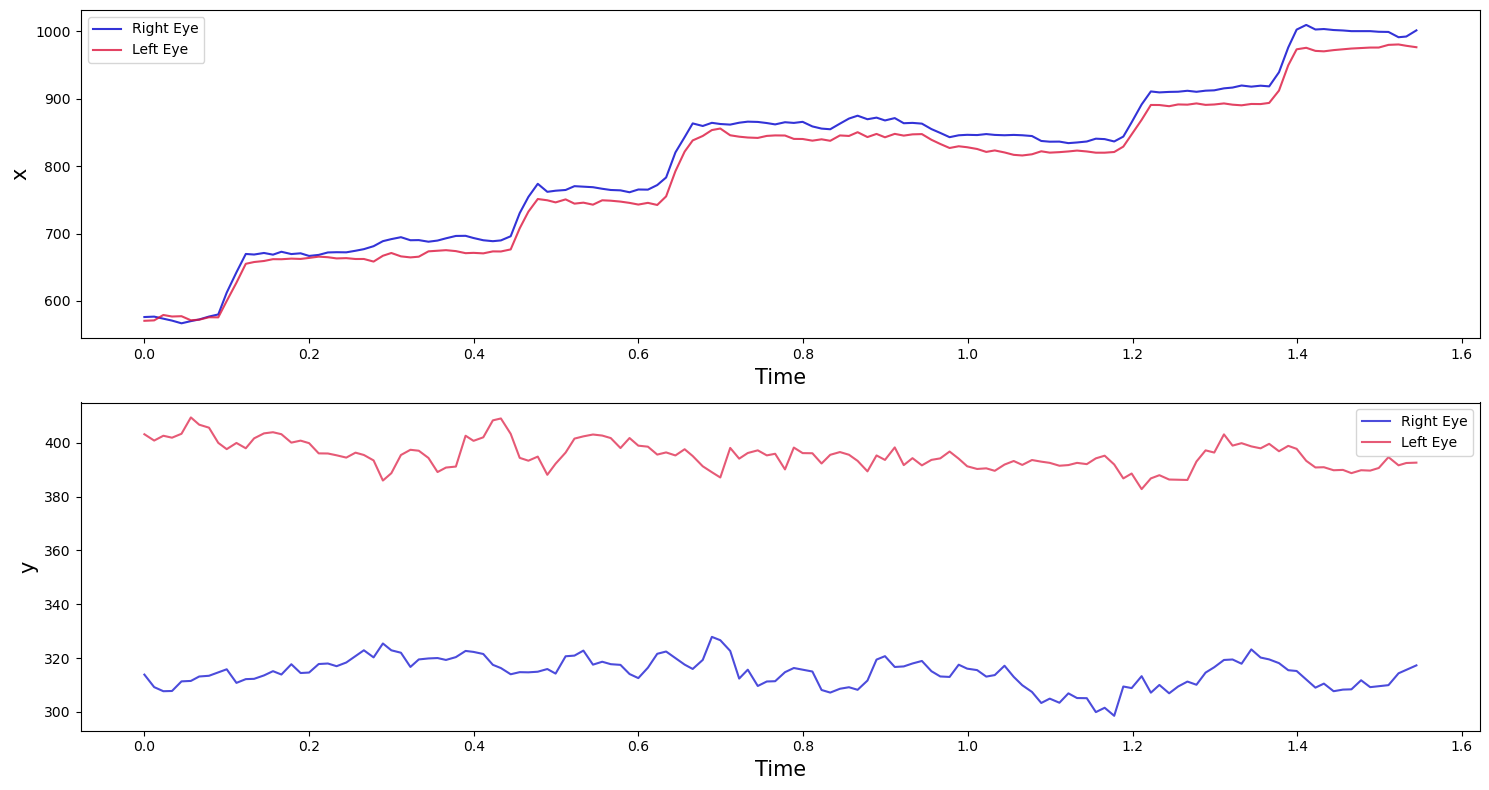

In [194]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


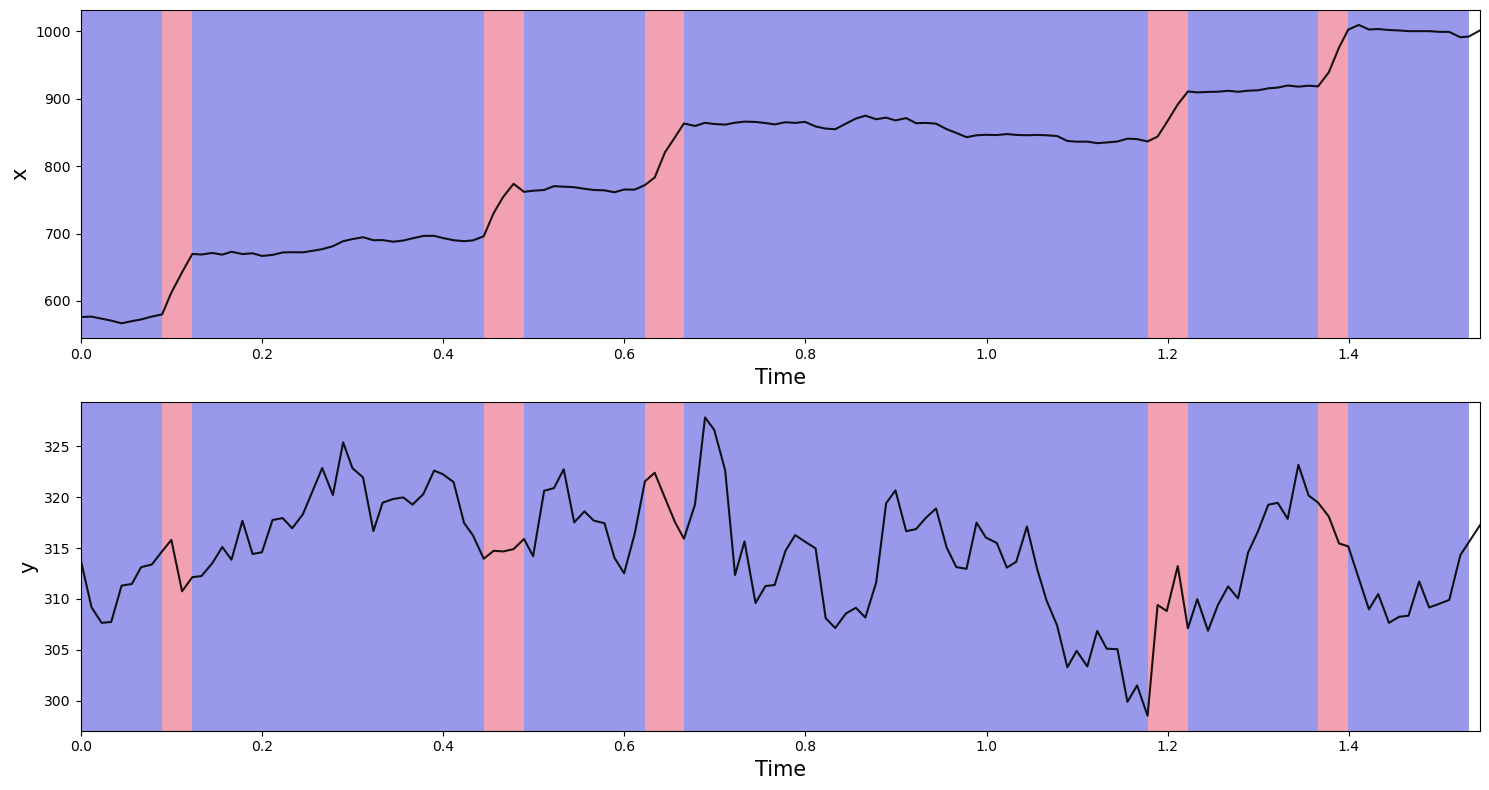

In [195]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [196]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to 

In [197]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-41.645172,42.291870,658.573486,18.569803,44.214924,659.775452,0.589531,...,3.569031,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,1
1,0.009374,1,1,-41.636787,42.330982,658.777771,18.596216,44.237904,659.960938,0.589484,...,3.571365,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,1
2,0.021275,1,1,-41.623562,42.373425,658.923340,18.605476,44.260330,660.123352,0.589435,...,3.574234,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,1
3,0.032459,1,1,-41.618259,42.433502,659.092285,18.639032,44.299019,660.286926,0.589399,...,3.573013,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,1
4,0.042933,1,1,-41.603378,42.480503,659.193115,18.655748,44.324490,660.376831,0.589352,...,3.575455,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,10.313873,1,1,-38.713295,39.961102,657.020203,21.350351,41.220467,658.150635,0.583406,...,3.373535,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,0
858,10.325139,1,1,-38.897743,39.964672,657.648315,21.237385,41.245327,658.592102,0.583727,...,3.388062,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,0
859,10.335624,1,1,-39.089424,39.972862,658.406128,21.145216,41.281128,659.091553,0.584047,...,3.396622,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,0
860,10.347560,1,1,-39.093239,39.999832,658.335632,21.113060,41.304142,659.235291,0.584063,...,3.405197,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Skimming,1


In [198]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [199]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-35.225849,39.566498,661.269531,25.397694,40.812443,661.519897,0.575338,...,3.223389,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,0
1,0.009980,1,1,-35.175686,39.533012,660.860657,25.405876,40.776054,661.247314,0.575277,...,3.228668,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,0
2,0.020532,1,1,-35.174614,39.468277,660.373962,25.355259,40.751617,660.928650,0.575332,...,3.233139,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,1
3,0.032722,1,1,-35.220711,39.469833,660.427979,25.300890,40.747181,660.954163,0.575425,...,3.241806,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,1
4,0.043602,1,1,-35.277245,39.425705,660.519836,25.265976,40.731449,661.051086,0.575538,...,3.255035,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13933,158.042826,1,1,-30.470867,35.382324,625.018127,29.439444,35.858734,625.096863,0.568918,...,2.755020,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,0
13934,158.055195,1,1,-30.412998,35.387707,625.095703,29.503906,35.859680,625.166809,0.568777,...,2.759308,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,0
13935,158.066631,1,1,-30.323565,35.397358,625.017090,29.576363,35.848770,625.079956,0.568581,...,2.763397,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,0
13936,158.076358,1,1,-30.279610,35.395477,624.926636,29.606152,35.840454,624.980042,0.568491,...,2.761230,True,AI_HC_P09_text.txt,9.0,22.0,Arial,HC,False,Immersive,1


In [200]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [201]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [202]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")